# Predicting Car Prices using Machine Learning

# Importing Project Libaries and Tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [26]:
import warnings
warnings.filterwarnings("ignore")

# 1. Preparing the Data

In [3]:
dataFrame = pd.read_csv("car_details.csv.xls")

dataFrame.head(5), dataFrame.tail(5)

(                       name  year  selling_price  km_driven    fuel  \
 0             Maruti 800 AC  2007          60000      70000  Petrol   
 1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
 2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
 3    Datsun RediGO T Option  2017         250000      46000  Petrol   
 4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
 
   seller_type transmission         owner  
 0  Individual       Manual   First Owner  
 1  Individual       Manual   First Owner  
 2  Individual       Manual   First Owner  
 3  Individual       Manual   First Owner  
 4  Individual       Manual  Second Owner  ,
                                      name  year  selling_price  km_driven  \
 4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
 4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
 4337                  Maruti 800 AC BSIII  2009         110000    

### Obtaining Basic Information

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Checking for missing (NaN) Values

In [5]:
dataFrame.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
# No missing / NaN values!

### Analyzing categorical / non-categorical columns

In [7]:
for col in dataFrame:
    print(dataFrame[col].value_counts())
    print("\n\n")

name
Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Hyundai EON Era Plus                35
Maruti Alto LX                      35
                                    ..
Audi A4 New  2.0 TDI Multitronic     1
Honda Amaze S Petrol BSIV            1
Maruti Ciaz VXi Plus                 1
Maruti Swift LXI Option              1
Force One EX                         1
Name: count, Length: 1491, dtype: int64



year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64



selling_price
300000    162
250000    125
350000    122
550000    107
600000    103
         ... 
749000      1
233000      1
614000      1
37500       1
865000     

# 2. Splitting the Data into X & Y

In [8]:
x, y = dataFrame.drop("selling_price", axis = 1), dataFrame["selling_price"]

x, y

(                                     name  year  km_driven    fuel  \
 0                           Maruti 800 AC  2007      70000  Petrol   
 1                Maruti Wagon R LXI Minor  2007      50000  Petrol   
 2                    Hyundai Verna 1.6 SX  2012     100000  Diesel   
 3                  Datsun RediGO T Option  2017      46000  Petrol   
 4                   Honda Amaze VX i-DTEC  2014     141000  Diesel   
 ...                                   ...   ...        ...     ...   
 4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014      80000  Diesel   
 4336           Hyundai i20 Magna 1.4 CRDi  2014      80000  Diesel   
 4337                  Maruti 800 AC BSIII  2009      83000  Petrol   
 4338     Hyundai Creta 1.6 CRDi SX Option  2016      90000  Diesel   
 4339                     Renault KWID RXT  2016      40000  Petrol   
 
      seller_type transmission         owner  
 0     Individual       Manual   First Owner  
 1     Individual       Manual   First Owner  
 2   

# 3. Analyzing the Data

In [9]:
dataFrame.corr(numeric_only = True)

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


* The more km_driven, the lesser the selling price and vice versa (Negative Degree)
* The greater the year, the more the selling price (Positive Degree)

### Plotting our Findings

In [10]:
dataFrame[dataFrame["selling_price"] < 1000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [11]:
filteredFrame = dataFrame[(dataFrame["selling_price"] < 1000000)]
filteredFrame

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


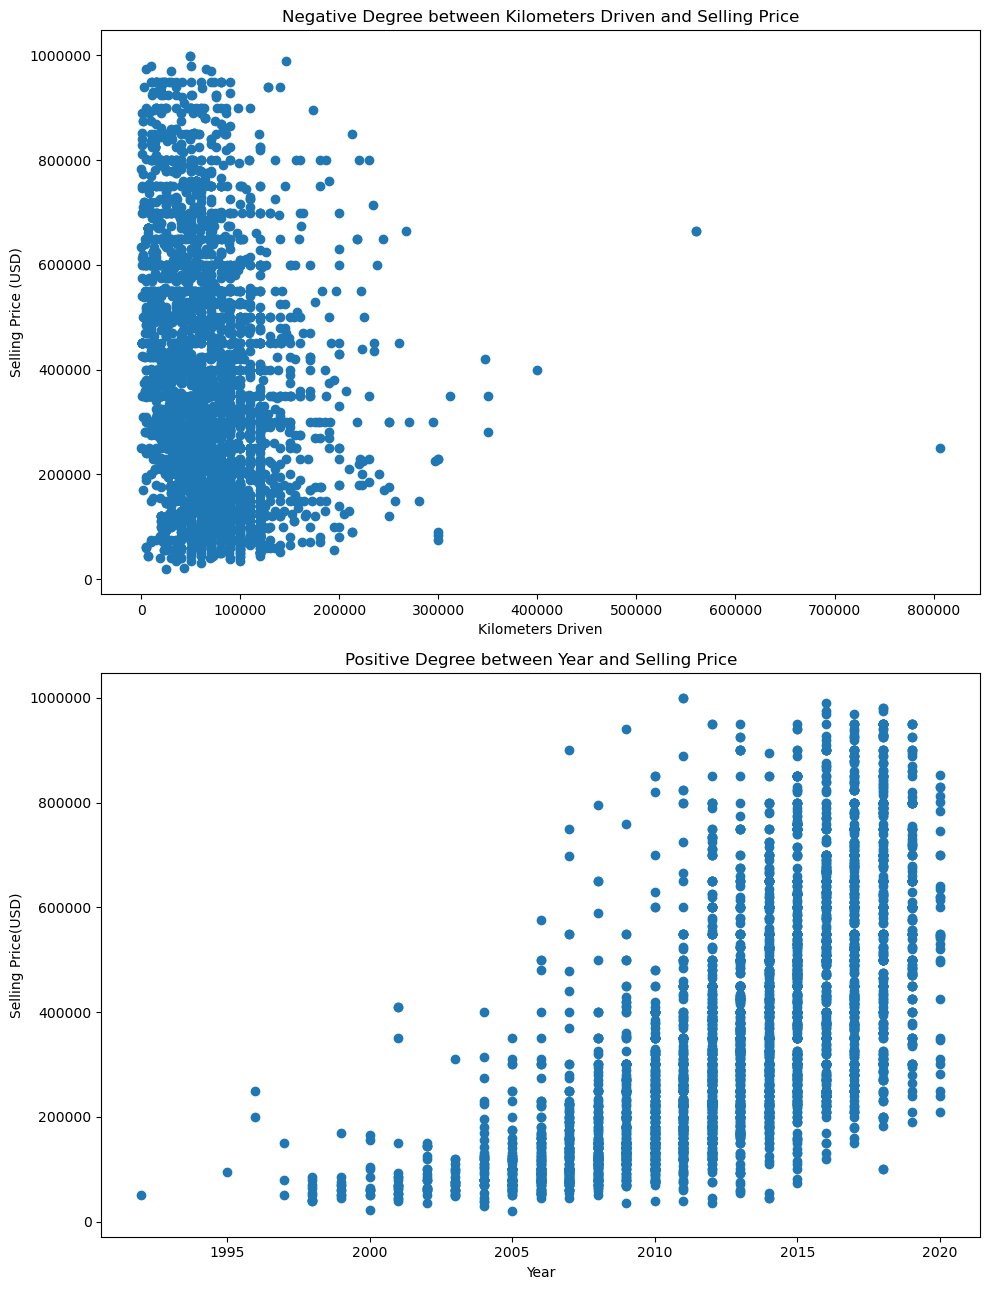

In [12]:
figure, (subplot1, subplot2) = plt.subplots(2, 1, figsize = (10, 13))

subplot1.scatter(
    x = filteredFrame["km_driven"],
    y = filteredFrame["selling_price"]
)
subplot1.set_xlabel("Kilometers Driven")
subplot1.set_ylabel("Selling Price (USD)")
subplot1.set_title("Negative Degree between Kilometers Driven and Selling Price")

subplot2.scatter(
    x = filteredFrame["year"],
    y = filteredFrame["selling_price"]
)
subplot2.set_xlabel("Year")
subplot2.set_ylabel("Selling Price(USD)")
subplot2.set_title("Positive Degree between Year and Selling Price")


subplot1.ticklabel_format(style = 'plain', axis = 'y')
subplot2.ticklabel_format(style = 'plain', axis = 'y')

plt.tight_layout()
plt.show()

# 4. Setting up the Data Imputation/Encoding Pipeline

In [13]:
categoricalCols = ["name", "fuel", "seller_type", "transmission", "owner"]
nonCategoricalCols = ["year", "km_driven"]

categoricalTransformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])

nonCategoricalTransformer = Pipeline(steps = [
    ("impute", SimpleImputer(strategy = "mean")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore", drop = "first"))
])

preprocessor = ColumnTransformer(transformers = [
    ("categorical", categoricalTransformer, categoricalCols),
    ("nonCategorical", nonCategoricalTransformer, nonCategoricalCols)
])

# 5. Initializing the Machine Learning Models

* Random Forest Regressor = rfr
* Ridge Regressor = rr
* Linear Regression = lr

In [14]:
rfr = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

rr = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

lr = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

rfr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner']),
                                                 ('nonCategorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['year', 'km_driven'])])),
                ('model', RandomForestRegressor())])

In [15]:
rr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner']),
                                                 ('nonCategorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['year', 'km_driven'])])),
                ('model', Ridge())])

In [16]:
lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner']),
                                                 ('nonCategorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['year', 'km_driven'])])),
                ('model', LinearRegression())])

# 6. Training the Models on the Data

#### Partitioning the data as
* Training Data = 80%
* Testing Data = 20%

In [17]:
np.random.seed(seed = 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3472, 7), (868, 7), (3472,), (868,))

In [18]:
rfr.fit(xtrain, ytrain)
rr.fit(xtrain, ytrain)
lr.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner']),
                                                 ('nonCategorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['year', 'km_driven'])])),
                ('model', LinearRegression())])

# 7. Making Prediction and Evaluating Performance Metrics

### Creating a Performance Metrics Calculator

In [19]:
def calculatePerformanceMetrics(models, ytest, xtest) -> None:
    for model in models:
        
        ypredicted = models[model].predict(xtest)

        r2, mean_abs = round(r2_score(ytest, ypredicted), 4) * 100, round(mean_absolute_error(ytest, ypredicted), 4)
        mean_squared = round(mean_squared_error(ytest, ypredicted), 4)

        print(f"Performance Metrics for {model}:")
        print(f"R^2 Score: {r2}\nMean Absolute Error: {mean_abs}\nMean Squared Error: {mean_squared}\n")


In [20]:
model_dict = {
    "Random Forest Regressor" : rfr,
    "Ridge Regressor" : rr,
    "Linear Regression" : lr
}

In [21]:
calculatePerformanceMetrics(model_dict, ytest, xtest)

Performance Metrics for Random Forest Regressor:
R^2 Score: 81.61
Mean Absolute Error: 118665.2122
Mean Squared Error: 55682746197.1999

Performance Metrics for Ridge Regressor:
R^2 Score: 85.49
Mean Absolute Error: 123232.9
Mean Squared Error: 43922779582.3178

Performance Metrics for Linear Regression:
R^2 Score: 86.6
Mean Absolute Error: 104262.8104
Mean Squared Error: 40571040295.1638



/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


* As we can see, the Linear Regression model is giving us the best of the three performance metrics, overall!
* However, we can still consider improving the R^2 value by tuning
* The problem is that the linear regression model does not have any tunable hyperparameters
* Therefore, we are now going to tune the Random Forest Regressor using RSCV and GSCV, both
* In this way, we can find out if tuned RFR can provide better performance metrics compared to a maxxed out LR model!

# 8. Tuning Hyperparameters for Random Forest Regressor

### Using Randomized Search Cross Validation (RSCV)

In [24]:
rfr_params1 = {
    "model__max_features" : ["auto", "sqrt", "log2"],
    "model__max_depth" : [None] + [num for num in range(10, 50, 10)],
    "model__min_samples_split" : [num for num in range(2, 5, 1)],
    "model__min_samples_leaf" : [num for num in range(1, 5, 1)],
    "model__n_estimators" : [num for num in range(100, 400, 50)]
}

rfr_tuned_rscv = RandomizedSearchCV(
    estimator = rfr,
    verbose = 0,
    cv = 5,
    n_iter = 50,
    param_distributions = rfr_params1
)

In [27]:
rfr_tuned_rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['name',
                                                                                'fuel',
                                                                                'seller_type',
                                                                                'transmission',
                                                                                'owner']),
                                                                              ('nonCategorical',
                                                                               Pipeline(steps=[('impute',
                                                                                                Sim...
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['year',
                                                                                'km_driven'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   n_iter=50,
                   param_distributions={'model__max_depth': [None, 10, 20, 30,
                                                             40],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 3, 4],
                                        'model__min_samples_split': [2, 3, 4],
                                        'model__n_estimators': [100, 150, 200,
                                                                250, 300,
                                                                350]})

In [23]:
rfr_tuned_rscv.best_params_

{'model__n_estimators': 300,
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': None}

In [24]:
calculatePerformanceMetrics({"Random Forest Regressor" : rfr_tuned_rscv}, ytest, xtest)

Performance Metrics for Random Forest Regressor:
R^2 Score: 82.99
Mean Absolute Error: 127856.8782
Mean Squared Error: 51505313169.6467



/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Using Grid Search Cross Validation (GSCV)

In [28]:
rfr_params2 = {
    "model__max_features" : ["sqrt", "log2"],
    "model__max_depth" : [None] + [num for num in range(10, 30, 10)],
    "model__min_samples_split" : [num for num in range(2, 5, 1)],
    "model__min_samples_leaf" : [num for num in range(1, 5, 1)],
    "model__n_estimators" : [num for num in range(100, 250, 50)]
}

rfr_tuned_gscv = GridSearchCV(
    estimator = rfr,
    verbose = 0,
    cv = 5,
    param_grid = rfr_params2
)

In [29]:
rfr_tuned_gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['name',
                                                                          'fuel',
                                                                          'seller_type',
                                                                          'transmission',
                                                                          'owner']),
                                                                        ('nonCategorical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['year',
                                                                          'km_driven'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 3, 4],
                         'model__min_samples_split': [2, 3, 4],
                         'model__n_estimators': [100, 150, 200]})

In [27]:
rfr_tuned_gscv.best_params_

{'model__max_depth': None,
 'model__max_features': 'log2',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [28]:
calculatePerformanceMetrics({"Random Forest Regressor" : rfr_tuned_gscv}, ytest, xtest)

Performance Metrics for Random Forest Regressor:
R^2 Score: 84.67
Mean Absolute Error: 121776.3223
Mean Squared Error: 46403260738.0144



/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# 9. Result Analysis

### Random Forest Regressor

#### No Tuning
* R^2 Score: 81.61
* Mean Absolute Error: 118665.2122
* Mean Squared Error: 55682746197.1999

#### After Tuning
* R^2 Score: 84.67
* Mean Absolute Error: 121776.3223
* Mean Squared Error: 46403260738.0144

### Ridge Regressor
* R^2 Score: 85.49
* Mean Absolute Error: 123232.9
* Mean Squared Error: 43922779582.3178

### Linear Regression
* R^2 Score: 86.6
* Mean Absolute Error: 104262.8104
* Mean Squared Error: 40571040295.1638

# 10. Final Plot with Predicted Value

In [30]:
y_predicted = lr.predict(xtest)

/Users/mac/miniconda3/envs/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
xtest

,name,year,km_driven,fuel,seller_type,transmission,owner
2761,Ford Aspire Titanium Plus Diesel BSIV,2019,15000,Diesel,Individual,Manual,First Owner
3210,Maruti Swift Dzire LDI,2014,70000,Diesel,Individual,Manual,Second Owner
2606,Hyundai Verna 1.6 SX,2012,90000,Diesel,Individual,Manual,First Owner
1030,Chevrolet Beat LT Option,2016,41000,Petrol,Dealer,Manual,First Owner
3942,Honda City i DTEC SV,2014,71318,Diesel,Dealer,Manual,First Owner
...,...,...,...,...,...,...,...
1206,Hyundai i10 Magna 1.2 iTech SE,2011,80000,Petrol,Individual,Manual,Second Owner
3167,Nissan Sunny Diesel XL,2013,90000,Diesel,Individual,Manual,Second Owner
1297,Tata Manza Aura Quadrajet,2009,60000,Diesel,Individual,Manual,Third Owner
2188,Honda City i VTEC V,2015,66521,Petrol,Trustmark Dealer,Manual,First Owner


In [42]:
y_predicted_frame = pd.DataFrame(y_predicted, columns = ["selling_price"])

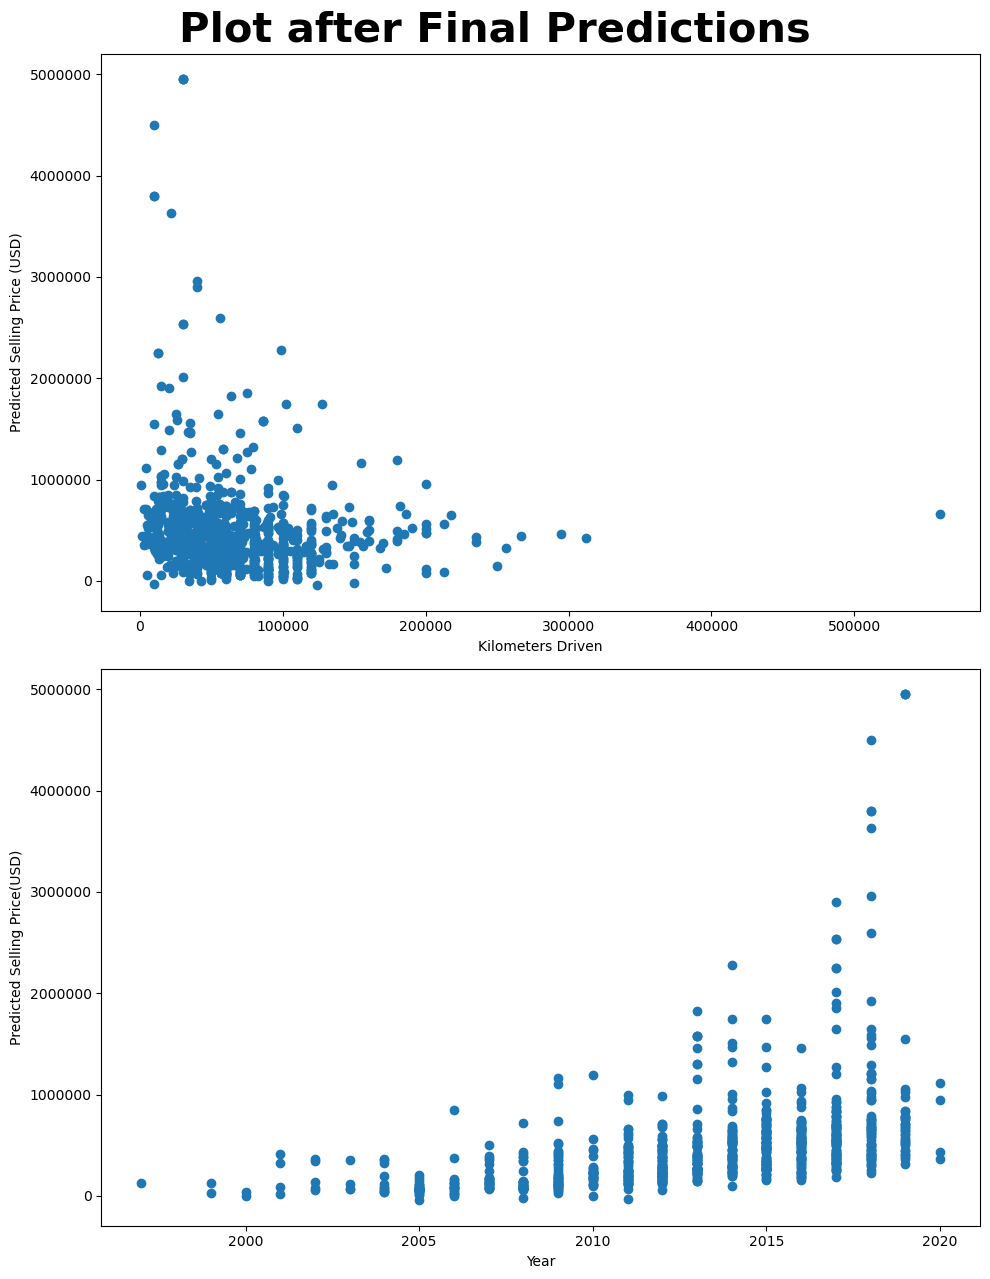

In [60]:
fig, (subplot1, subplot2) = plt.subplots(2, 1, figsize = (10, 13))

subplot1.scatter(
    x = xtest["km_driven"],
    y = y_predicted_frame["selling_price"],
    alpha = 1
)
subplot1.set_xlabel("Kilometers Driven")
subplot1.set_ylabel("Predicted Selling Price (USD)")

subplot2.scatter(
    x = xtest["year"],
    y = y_predicted_frame["selling_price"],
    alpha = 1
)
subplot2.set_xlabel("Year")
subplot2.set_ylabel("Predicted Selling Price(USD)")

subplot1.ticklabel_format(style = 'plain', axis = 'y')
subplot2.ticklabel_format(style = 'plain', axis = 'y')

fig.suptitle("Plot after Final Predictions", fontsize = 30, fontweight = "bold")
fig.savefig("Plot of Selling Price Predictions.jpg")

plt.tight_layout()
plt.show()

# 11. Saving the Final Tuned Model

In [61]:
from joblib import dump

dump(lr, "Linear Regression Tuned.joblib")

['Linear Regression Tuned.joblib']